In [52]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_parquet("../../data/high_10m.parquet")

df.head()

,DATE,SYMBOL,TIME,ALL_EX,MID_OPEN,SUM_DELTA,RETURN_NoOVERNIGHT,RETURN_SiOVERNIGHT
0,2021-12-01,A,09:30:00,DNYBTJVPCZUKXHA,152.190,-8.401819,0.000000,0.000000
1,2021-12-01,A,09:40:00,PBTJVDZUYKNHCXM,150.490,0.473357,-0.011170,-0.011170
2,2021-12-01,A,09:50:00,KDPBTJVNZUCXYH,151.475,-10.867709,0.006545,0.006545
3,2021-12-01,A,10:00:00,DABTJNKYVPZUXCH,150.510,-0.125414,-0.006371,-0.006371
4,2021-12-01,A,10:10:00,DVJTPNKUZYACBXHM,151.960,-1.274648,0.009634,0.009634


In [45]:
intra = df.groupby(["SYMBOL", "DATE"])["RETURN"].std().reset_index().groupby("SYMBOL")["RETURN"].mean().reset_index().rename(
    columns= {"RETURN" : "INTRA_STD"}
)

#overnight_shift = df.groupby(["SYMBOL", "DATE"])["RETURN"].apply(lambda x : [list(x)[0], list(x)[-1]])
overnight_shift = df.groupby(["SYMBOL", "DATE"])["RETURN"].agg([
    ("First_Return", lambda x : float(list(x)[0])),
    ("Last_Return", lambda x : float(list(x)[-1]))
])



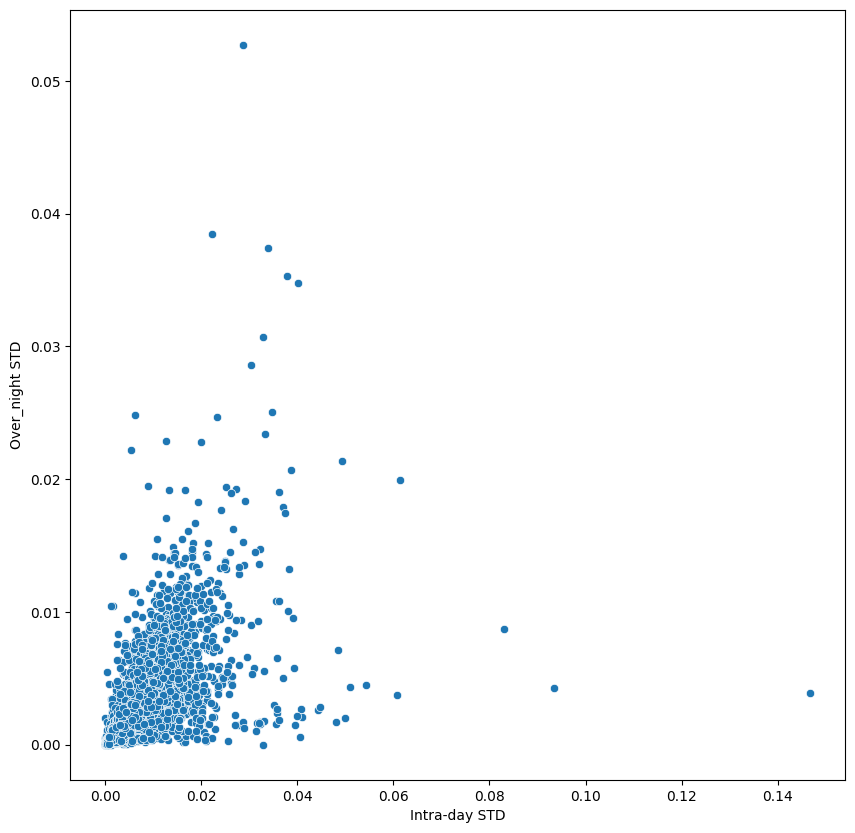

In [ ]:
overnight_shift["Previous_Return"] = overnight_shift["Last_Return"].shift(1).fillna(0)
overnight_shift["Squar_diff"] = overnight_shift[["Previous_Return", "Last_Return"]].std(axis = "columns")

on_std = overnight_shift.groupby("SYMBOL")["Squar_diff"].mean().reset_index()

df_std = pd.concat([intra[["SYMBOL", "INTRA_STD"]], on_std["Squar_diff"]], axis = 1)

plt.figure(figsize=(10, 10))
sns.scatterplot(data = df_std, x = "INTRA_STD", y = "Squar_diff", )
plt.xlabel("Intra-day STD")
plt.ylabel("Over_night STD")
plt.show()

In [49]:
df["SYMBOL"].value_counts()

SYMBOL
ZYXI     836
ZYNE     836
ZYME     836
ZY       836
ZWS      836
        ... 
NPAB       2
BCSA       2
CTEST      1
EVGBC      1
PSFJ       1
Name: count, Length: 9509, dtype: int64